In [1]:
#pip install pgmpy

In [7]:
#importing needed libraries
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import matplotlib.pyplot as plt

C:\Users\Shakiba\.conda\envs\pgm\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
'''
In this section we are constructing the Bayesian netwok by defining its nodes, its connections, 
prior probabilities of the root nodes and CPTs of other nodes
'''

#Fs1  = 'The risk of animals is not healthy'
#Fs2  = 'Animal risk is stress and pain'
#Fs3  = 'The risk of the knifeused to slaughter is not hugienic'
#Fs4  = 'The risk of cow body parts is not safe because they contain becteria'
#Fs5  = 'The risk of a knife used to cut unhygienic (rusty) parts of an animal'
#Fs6  = 'The location of cutting animal parts is not hygienic'
#Fs7  = 'Transportation equipment for meat ditribution is not hygienic'
#Fs8  = 'Meat distribution equipment is not equipped with refrigerators'
#p1 = 'pre-slaughter'
#p2 = 'slaughter'
#p3 = 'post-slaughter'

Fs1  = 'Fs1'
Fs2  = 'Fs2'
Fs3  = 'Fs3'
Fs4  = 'Fs4'
Fs5  = 'Fs5'
Fs6  = 'Fs6'
Fs7  = 'Fs7'
Fs8  = 'Fs8'
p1 = 'p1'
p2 = 'p2'
p3 = 'p3'
ris = 'ris'

model = BayesianNetwork([(Fs2,p1),(Fs1,p1),(Fs3,p2),(Fs4,p2),(Fs5,p2),(Fs6,p2),(Fs7,p3),(Fs8,p3),(p1,ris),(p2,ris),(p3,ris)])

#Prior probabilites(root nodes)
cpd_Fs2 = TabularCPD(variable=Fs2, variable_card=2, values=[[0.96], [0.04]], state_names={Fs2: ['N','Y']})
cpd_Fs1 = TabularCPD(variable=Fs1, variable_card=2, values=[[0.96], [0.04]], state_names={Fs1: ['N','Y']})
cpd_Fs3 = TabularCPD(variable=Fs3, variable_card=2, values=[[0.94], [0.06]], state_names={Fs3: ['N','Y']})
cpd_Fs4 = TabularCPD(variable=Fs4, variable_card=2, values=[[0.94], [0.06]], state_names={Fs4: ['N','Y']})
cpd_Fs5 = TabularCPD(variable=Fs5, variable_card=2, values=[[0.96], [0.04]], state_names={Fs5: ['N','Y']})
cpd_Fs6 = TabularCPD(variable=Fs6, variable_card=2, values=[[0.96], [0.04]], state_names={Fs6: ['N','Y']})
cpd_Fs7 = TabularCPD(variable=Fs7, variable_card=2, values=[[0.96], [0.04]], state_names={Fs7: ['N','Y']})
cpd_Fs8 = TabularCPD(variable=Fs8, variable_card=2, values=[[0.92], [0.08]], state_names={Fs8: ['N','Y']})


#Conditional Probabities (cpt)
cpd_p1 = TabularCPD(variable=p1, variable_card=2,
                    values=[[0.00, 0.00, 0.00, 0.84],
                            [1.00, 1.00, 1.00, 0.16]],
                    evidence=[Fs1, Fs2],
                    evidence_card=[2, 2],
                    state_names={p1: ['N','Y'], Fs1: ['N','Y'], Fs2: ['N','Y']})
'''

                            values=[[0.90, 0.70, 0.60, 0.84],
                            [0.10, 0.30, 0.40, 0.16]],
'''
cpd_p2 = TabularCPD(variable=p2, variable_card=2,
                    values=[[0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.69],
                           [1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 0.31]],
                    evidence=[Fs3, Fs4, Fs5, Fs6],
                    evidence_card=[2, 2, 2, 2],
                    state_names={p2: ['N','Y'], Fs3: ['N','Y'], Fs4: ['N','Y'], Fs5: ['N','Y'], Fs6: ['N','Y']})


cpd_p3 = TabularCPD(variable=p3, variable_card=2,
                    values=[[0.00, 0.00, 0.00, 0.81],
                            [1.00, 1.00, 1.00, 0.19]],
                    evidence=[Fs7, Fs8],
                    evidence_card=[2, 2],
                    state_names={p3: ['N','Y'], Fs7: ['N','Y'], Fs8: ['N','Y']})

cpd_ris = TabularCPD(variable=ris, variable_card=2,
                    values=[[0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.26],
                            [1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 0.74]],
                    evidence=[p1, p2, p3],
                    evidence_card=[2, 2, 2],
                    state_names={ris: ['N','Y'], p1: ['N','Y'], p2: ['N','Y'], p3: ['N','Y']})
'''
[[0.4, 0.32, 0.32, 0.32, 0.32, 0.3, 0.29, 0.26],
                            [0.6, 0.68, 0.68, 0.68, 0.68, 0.7, 0.71, 0.74]],
'''
model.add_cpds(cpd_Fs1,cpd_Fs2, cpd_Fs3, cpd_Fs4, cpd_Fs5, cpd_Fs6, cpd_Fs7, cpd_Fs8, cpd_p1, cpd_p2, cpd_p3, cpd_ris)
model.check_model()

for cpds in model.get_cpds():
    print(f'CPT of {cpds.variable} ==>')
    print(cpds, '\n')


CPT of Fs1 ==>
+--------+------+
| Fs1(N) | 0.96 |
+--------+------+
| Fs1(Y) | 0.04 |
+--------+------+ 

CPT of Fs2 ==>
+--------+------+
| Fs2(N) | 0.96 |
+--------+------+
| Fs2(Y) | 0.04 |
+--------+------+ 

CPT of Fs3 ==>
+--------+------+
| Fs3(N) | 0.94 |
+--------+------+
| Fs3(Y) | 0.06 |
+--------+------+ 

CPT of Fs4 ==>
+--------+------+
| Fs4(N) | 0.94 |
+--------+------+
| Fs4(Y) | 0.06 |
+--------+------+ 

CPT of Fs5 ==>
+--------+------+
| Fs5(N) | 0.96 |
+--------+------+
| Fs5(Y) | 0.04 |
+--------+------+ 

CPT of Fs6 ==>
+--------+------+
| Fs6(N) | 0.96 |
+--------+------+
| Fs6(Y) | 0.04 |
+--------+------+ 

CPT of Fs7 ==>
+--------+------+
| Fs7(N) | 0.96 |
+--------+------+
| Fs7(Y) | 0.04 |
+--------+------+ 

CPT of Fs8 ==>
+--------+------+
| Fs8(N) | 0.92 |
+--------+------+
| Fs8(Y) | 0.08 |
+--------+------+ 

CPT of p1 ==>
+-------+--------+--------+--------+--------+
| Fs1   | Fs1(N) | Fs1(N) | Fs1(Y) | Fs1(Y) |
+-------+--------+--------+--------+--

In this section some samples of Flow of probabilistic influence have been shown.

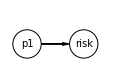

p1 ===> pre-slaughter


In [1]:
# direct cause
'''
We can see from the network pre-slaughtering process directly affect on the risk in food safety
'''
import daft
import matplotlib.pyplot as plt
from daft import PGM
p1 = 'p1'
ris = 'ris'
pgm = PGM(shape=[2, 1])
pgm.add_node(daft.Node(p1, "p1", 1, 1))
pgm.add_node(daft.Node(ris, "risk", 2, 1))
pgm.add_edge(p1,ris)
pgm.render()
plt.show()
print('p1 ===> pre-slaughter')


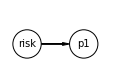

In [4]:
# direct effect
'''
We can see that food safety can be an effect of pre-slaughtering process
'''
pgm = PGM(shape=[2, 1])
pgm.add_node(daft.Node(ris, "risk", 1, 1))
pgm.add_node(daft.Node(p1, "p1", 2, 1))
pgm.add_edge(ris, p1)
pgm.render()
plt.show()


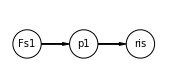

In [5]:
# CAUSAL TRAIL
'''
any changes in the The risk of animals is not healthy (Fs1), will have effect on pre-slaughtering process (p1) 
and it will change the values in the Risk of food safety (ris). It means Fs1 indirectly affect on the risk.
Now p1 is observed i.e., we know its value, any change in Fs1 won’t affect ris. 
'''

pgm = PGM(shape=[3, 1])
pgm.add_node(daft.Node(Fs1, "Fs1", 1, 1))
pgm.add_node(daft.Node(p1, "p1", 2, 1))
pgm.add_node(daft.Node(ris, "ris", 3, 1))
pgm.add_edge(Fs1,p1)
pgm.add_edge(p1,ris)
pgm.render()

plt.show()


In [ ]:
# common cause
'''For this network there is not common cause. Because there is not any node which have 2 children'''

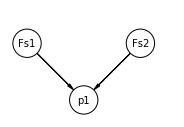

In [6]:
# common effect
'''
When pre-slaughtering process (p1) is not observed, any change in (Fs1) reflects some changes in p1 but not in Fs2. 
But when p1 is observed, if Fs1 is also observed, this will change the probability of occurring Fs2. 
'''
pgm = PGM(shape=[3, 2])
pgm.add_node(daft.Node(Fs1, "Fs1", 1, 2))
pgm.add_node(daft.Node(p1, "p1", 2, 1))
pgm.add_node(daft.Node(Fs2, "Fs2", 3, 2))

pgm.add_edge(Fs1,p1)
pgm.add_edge(Fs2,p1)
pgm.render()
plt.show()

In [9]:
#A variable is conditionally independent of non-descendant variables given its parents.
print('Local independencies ---------------->')
print('')
print('Local Independencies of Fs1  ==>' , model.local_independencies([Fs1]))
print('Local Independencies of p1   ==>' , model.local_independencies([p1]))
print('Local Independencies of risk ==>' , model.local_independencies([ris]))
print('')
#A variable is conditionally independent of all other variables given its Markov blanket which is its parents,children, and children’s parents.
print('Markov blanket       ---------------->')
print('')
print('Markov blanket of Fs1      ==>' , model.get_markov_blanket(Fs1))
print('Markov blanket of p1       ==>' , model.get_markov_blanket(p1))
print('Markov blanket of risk     ==>' , model.get_markov_blanket(ris))
print('')
#When influence can flow from X to Y via Z then trail X—Z—Y is active. 
print('Active trails       ---------------->')
print('')
print('Active Trails of node Fs1    ==>' , model.active_trail_nodes([Fs1]))
print('Active Trails of node p1    ==>' , model.active_trail_nodes([p1]))
print('Active Trails of node risk    ==>' , model.active_trail_nodes([ris]))
print('')
#Two nodes are d-separated if there is no active trail between them.
print('D-separation       ---------------->')
print('')
print('Are Fs1 and p1 d-separated?  ==>' , not(model.is_dconnected(Fs1, p1)))
print('Are Fs8 and p1 d-separated?  ==>' , not(model.is_dconnected(Fs8, p1)))


Local independencies ---------------->

Local Independencies of Fs1  ==> (Fs1 ⟂ p3, Fs8, Fs5, Fs4, p2, Fs7, Fs6, Fs2, Fs3)
Local Independencies of p1   ==> (p1 ⟂ p3, Fs8, Fs5, p2, Fs4, Fs7, Fs6, Fs3 | Fs2, Fs1)
Local Independencies of risk ==> (ris ⟂ Fs8, Fs5, Fs7, Fs4, Fs6, Fs2, Fs1, Fs3 | p1, p3, p2)

Markov blanket       ---------------->

Markov blanket of Fs1      ==> ['Fs2', 'p1']
Markov blanket of p1       ==> ['p3', 'ris', 'p2', 'Fs2', 'Fs1']
Markov blanket of risk     ==> ['p1', 'p3', 'p2']

Active trails       ---------------->

Active Trails of node Fs1    ==> {'Fs1': {'p1', 'Fs1', 'ris'}}
Active Trails of node p1    ==> {'p1': {'Fs2', 'p1', 'Fs1', 'ris'}}
Active Trails of node risk    ==> {'ris': {'p3', 'Fs8', 'Fs5', 'ris', 'p1', 'Fs4', 'p2', 'Fs7', 'Fs6', 'Fs2', 'Fs1', 'Fs3'}}

D-separation       ---------------->

Are Fs1 and p1 d-separated?  ==> False
Are Fs8 and p1 d-separated?  ==> True


In [10]:
from pgmpy.inference import VariableElimination
import time
infer = VariableElimination(model)

print(infer.query([ris]))
print(infer.query([ris],evidence={p1: 'Y'}))

start_time = time.time()
print(infer.query([ris],evidence={p1: 'Y', p2: 'Y', p3: 'Y'}))
print(f'--- time of execution: {time.time() - start_time:0,.4f} seconds ---\n')


start_time = time.time()
print(infer.query([ris],evidence={p1: 'Y', p2: 'Y', p3: 'Y'},elimination_order="MinNeighbors"))
print(f'--- time of execution: {time.time() - start_time:0,.4f} seconds ---\n')

start_time = time.time()
print(infer.query([ris],evidence={p1: 'Y', p2: 'Y', p3: 'Y'},elimination_order="MinFill"))
print(f'--- time of execution: {time.time() - start_time:0,.4f} seconds ---\n')

start_time = time.time()
print(infer.query([ris],evidence={p1: 'Y', p2: 'Y', p3: 'Y'},elimination_order="MinWeight"))
print(f'--- time of execution: {time.time() - start_time:0,.4f} seconds ---\n')

start_time = time.time()
print(infer.query([ris],evidence={p1: 'Y', p2: 'Y', p3: 'Y'},elimination_order="WeightedMinFill"))
print(f'--- time of execution: {time.time() - start_time:0,.4f} seconds ---\n')


Eliminating: Fs3: 100%|███████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 450.01it/s]


+--------+------------+
| ris    |   phi(ris) |
+========+============+
| ris(N) |     0.2590 |
+--------+------------+
| ris(Y) |     0.7410 |
+--------+------------+


Eliminating: Fs3: 100%|█████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 333.39it/s]


+--------+------------+
| ris    |   phi(ris) |
+========+============+
| ris(N) |     0.2593 |
+--------+------------+
| ris(Y) |     0.7407 |
+--------+------------+


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+--------+------------+
| ris    |   phi(ris) |
+========+============+
| ris(N) |     0.2600 |
+--------+------------+
| ris(Y) |     0.7400 |
+--------+------------+
--- time of execution: 0.0281 seconds ---



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+--------+------------+
| ris    |   phi(ris) |
+========+============+
| ris(N) |     0.2600 |
+--------+------------+
| ris(Y) |     0.7400 |
+--------+------------+
--- time of execution: 0.0347 seconds ---



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+--------+------------+
| ris    |   phi(ris) |
+========+============+
| ris(N) |     0.2600 |
+--------+------------+
| ris(Y) |     0.7400 |
+--------+------------+
--- time of execution: 0.0346 seconds ---



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+--------+------------+
| ris    |   phi(ris) |
+========+============+
| ris(N) |     0.2600 |
+--------+------------+
| ris(Y) |     0.7400 |
+--------+------------+
--- time of execution: 0.0295 seconds ---



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+--------+------------+
| ris    |   phi(ris) |
+========+============+
| ris(N) |     0.2600 |
+--------+------------+
| ris(Y) |     0.7400 |
+--------+------------+
--- time of execution: 0.0279 seconds ---



In [11]:
# Sampling from an empty network
from pgmpy.inference import ApproxInference
from pgmpy.sampling import BayesianModelSampling, GibbsSampling
infer_approximate = ApproxInference(model)
print(infer_approximate.query(variables=[ris], n_samples=20)) 
print(infer_approximate.query(variables=[ris], n_samples=1000)) 

Generating for node: ris: 100%|███████████████████████████████████████████████████████| 12/12 [00:00<00:00, 231.40it/s]


+--------+------------+
| ris    |   phi(ris) |
+========+============+
| ris(N) |     0.2000 |
+--------+------------+
| ris(Y) |     0.8000 |
+--------+------------+


Generating for node: ris: 100%|███████████████████████████████████████████████████████| 12/12 [00:00<00:00, 207.03it/s]

+--------+------------+
| ris    |   phi(ris) |
+========+============+
| ris(N) |     0.2330 |
+--------+------------+
| ris(Y) |     0.7670 |
+--------+------------+


In [12]:
infer_BayesianSampling = BayesianModelSampling(model)
forward_sampling_df = infer_BayesianSampling.forward_sample(size=1000, seed=1, show_progress=False)
forward_sampling_df

,Fs2,p1,Fs1,Fs3,p2,Fs4,Fs5,Fs6,Fs7,p3,Fs8,ris
0,N,Y,N,N,Y,N,N,N,N,Y,N,N
1,N,Y,N,N,Y,N,N,N,N,Y,N,Y
2,N,Y,N,N,Y,N,N,N,N,Y,N,N
3,N,Y,N,N,Y,Y,N,Y,N,Y,N,N
4,N,Y,N,N,Y,Y,N,N,N,Y,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Y,Y,N,N,Y,N,N,N,N,Y,N,Y
996,N,Y,N,N,Y,N,N,N,N,Y,N,N
997,N,Y,N,N,Y,N,N,N,N,Y,N,Y
998,N,Y,N,N,Y,N,Y,N,N,Y,N,Y


In [13]:
print(infer_approximate.get_distribution(samples=forward_sampling_df, variables=[ris]))

+--------+------------+
| ris    |   phi(ris) |
+========+============+
| ris(N) |     0.2710 |
+--------+------------+
| ris(Y) |     0.7290 |
+--------+------------+


In [14]:
# Likelihood weighted Sampling:
from pgmpy.factors.discrete import State
evidence = [State('p1', 'Y')]
print(infer_approximate.get_distribution(infer_BayesianSampling.likelihood_weighted_sample
                                         ( size=14 , seed=1, evidence=evidence, show_progress=False), [ris], joint=True))
print(infer_approximate.get_distribution(infer_BayesianSampling.likelihood_weighted_sample
                                         ( size=5000, seed=1, evidence=evidence, show_progress=False), [ris], joint=True))

+--------+------------+
| ris    |   phi(ris) |
+========+============+
| ris(N) |     0.6429 |
+--------+------------+
| ris(Y) |     0.3571 |
+--------+------------+
+--------+------------+
| ris    |   phi(ris) |
+========+============+
| ris(N) |     0.2510 |
+--------+------------+
| ris(Y) |     0.7490 |
+--------+------------+


In [15]:
# Rejection Sampling:
print(infer_approximate.get_distribution(infer_BayesianSampling.rejection_sample
                                         ( size=20 , seed=1, evidence=evidence, show_progress=False), [ris]))
print(infer_approximate.get_distribution(infer_BayesianSampling.rejection_sample
                                         ( size=1000 , seed=1, evidence=evidence, show_progress=False), [ris]))


+--------+------------+
| ris    |   phi(ris) |
+========+============+
| ris(N) |     0.2500 |
+--------+------------+
| ris(Y) |     0.7500 |
+--------+------------+
+--------+------------+
| ris    |   phi(ris) |
+========+============+
| ris(N) |     0.2640 |
+--------+------------+
| ris(Y) |     0.7360 |
+--------+------------+
